In [1]:
from threeML import *
from threeML.analysis_results import *
import astropy.io.fits as fits
import astropy.units as u
import numpy as np


[WARNING ] The naima package is not available. Models that depend on it will not be available
[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.
[WARNING ] The ebltable package is not available. Models that depend on it will not be available
[INFO    ] Starting 3ML!
[WARNING ] no display variable set. using backend for graphics without display (agg)
[WARNING ] ROOT minimizer not available
[WARNING ] Multinest minimizer not available
[WARNING ] PyGMO is not available
[WARNING ] The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)
[WARNING ] Could not import plugin FermiLATLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] Could not import plugin HAWCLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] No fermitools installed
[WARNING ] Env. variable OMP_NUM_THREADS is not set.

In [2]:
plt.style.use('default')

In [3]:
silence_logs()
from tqdm.auto import tqdm
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
import matplotlib.pyplot as plt

set_threeML_style()

In [4]:
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
#rev = [43,44,45,47,51,55,102,103,123,124,125,126,170,177,181,182,225,229,239,242,300,301,308,352,365,372,412,420,428,464,468,483,541,605,662,665,666,727,728,774,834,835,836,839,902,903,917,966,967,968,970,1019,1021,1022,1024,1026,1027,1028,1089,1096,1141,1214,1221,1268,1278,1328,1342,1444,1462,1468,1505,1515,1528,1577,1593,1597,1644,1648,1658,1715,1723,1736,1781,1784,1785,1794,1801,1866,1867,1930,1999,2010]
#Vernachlässige schlechte Ergebnisse
# ohne Rev 103
#rev = [43,44,45,47,51,55,102,123,124,125,126,170,177,181,182,225,229,239,242,300,301,308,352,365,372,412,420,428,464,468,483,541,605,662,665,666,727,728,774,834,835,836,839,902,903,917,966,967,968,970,1019,1021,1022,1024,1026,1027,1028,1089,1096,1141,1214,1221,1268,1278,1328,1342,1444,1462,1468,1505,1515,1528,1577,1593,1597,1644,1648,1658,1715,1723,1736,1781,1784,1785,1794,1801,1866,1867,1930,1999,2010]
# ohne Rev 170, 1715
#rev = [43,44,45,47,51,55,102,123,124,125,126,177,181,182,225,229,239,242,300,301,308,352,365,372,412,420,428,464,468,483,541,605,662,665,666,727,728,774,834,835,836,839,902,903,917,966,967,968,970,1019,1021,1022,1024,1026,1027,1028,1089,1096,1141,1214,1221,1268,1278,1328,1342,1444,1462,1468,1505,1515,1528,1577,1593,1597,1644,1648,1658,1723,1736,1781,1784,1785,1794,1801,1866,1867,1930,1999,2010]
# ohne Rev 1505
#Broken Revs korrigiert, 412, 662, 1504, 1506 ausgelassen
#rev = [43,44,45,47,51,55,58,102,123,124,125,126,177,181,182,225,229,239,242,300,301,308,352,365,372,420,422,428,464,468,483,541,605,665,666,727,728,774,834,835,836,839,902,903,917,966,967,968,970,1019,1021,1022,1023,1024,1026,1027,1028,1089,1096,1140,1141,1214,1221,1268,1269,1278,1327,1328,1342,1387,1444,1447,1456,1461,1462,1466,1468,1515,1516,1520,1524,1528,1577,1581,1593,1597,1598,1599,1644,1648,1658,1662,1664,1667,1719,1723,1724,1728,1733,1736,1781,1784,1785,1789,1794,1797,1801,1850,1856,1857,1866,1867,1877,1921,1925,1927,1928,1930,1943,1987,1991,1996,1999,2000,2010]

#good revs
rev = [43, 44, 45, 47, 51, 55, 58, 102, 123, 124, 125, 126, 177, 181, 182, 225, 229, 239, 242, 300, 301, 308, 352, 365, 372, 412, 420, 428, 464, 468, 483, 541, 662, 728, 836, 902, 917, 970, 1023, 1024, 1026, 1028, 1140, 1141, 1214, 1269, 1278, 1342, 1444, 1447, 1456, 1466, 1468, 1504, 1505, 1520, 1524, 1528, 1577, 1581, 1593, 1597, 1644, 1648, 1658, 1664, 1667, 1719, 1728, 1733, 1736, 1781, 1789, 1794, 1797, 1801, 1850, 1866, 1877, 1921, 1925, 1930, 1943, 1987, 1991, 1996, 2010]

MJD = []
IJD = []

#K_combined = []
#K_combined_err = []
#alpha_combined = []
#alpha_combined_err = []
#beta_combined = []
#beta_combined_err = []
#cons_crab_PSD = []
#cons_crab_PSD_err = []

flux24_50 = []
flux24_50_err_low = []
flux24_50_err_up = []

flux50_150  = []
flux50_150_err_low = []
flux50_150_err_up = []

flux150_400 = []
flux150_400_err_low = []
flux150_400_err_up = []

flux400_650 = []
flux400_650_err_low = []
flux400_650_err_up = []

flux650_2000 = []
flux650_2000_err_low = []
flux650_2000_err_up = []

flux2000_8000 = []
flux2000_8000_err_low = []
flux2000_8000_err_up = []


flux1 = load_analysis_results("3ml_Crab_Parameters_SE_0-5Bin_24-600keV_rev43.fits").get_point_source_flux(20 * u.keV, 40 * u.keV) #for units on ylabel only

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

In [6]:
#####################
# IMPORT DATASETS #
#####################

def import_fits_combined(rev):
    ar = load_analysis_results("3ml_Crab_Parameters_combined_newBin_24-8000keV_rev" + str(rev) + ".fits")
    
    #K_n = ar.get_variates("crab.spectrum.main.Broken_powerlaw.K")
    #alpha_n = ar.get_variates("crab.spectrum.main.Broken_powerlaw.alpha")
    #beta_n = ar.get_variates("crab.spectrum.main.Broken_powerlaw.beta")
    #cons_crab_PSD_n = ar.get_variates("cons_crab_PSD")
    
    flux_24_50 = ar.get_point_source_flux(24 * u.keV, 50 * u.keV, flux_unit='1 / (cm**2 s)' ) 
    flux_50_150 = ar.get_point_source_flux(50 * u.keV, 150 * u.keV, flux_unit='1 / (cm**2 s )')
    flux_150_400 = ar.get_point_source_flux(150 * u.keV, 400 * u.keV, flux_unit='1 / (cm**2 s)')
    flux_400_650 = ar.get_point_source_flux(400 * u.keV, 650 * u.keV, flux_unit='1 / (cm**2 s)')
    flux_650_2000 = ar.get_point_source_flux(650 * u.keV, 2000 * u.keV, flux_unit='1 / (cm**2 s)')
    flux_2000_8000 = ar.get_point_source_flux(2000 * u.keV, 8000 * u.keV, flux_unit='1 / (cm**2 s)')
    
    #K_combined.append(K_n.value)
    #K_combined_err.append((K_n.equal_tail_interval()[1] - K_n.equal_tail_interval()[0])/2)
    #alpha_combined.append(alpha_n.value)
    #alpha_combined_err.append((alpha_n.equal_tail_interval()[1] - alpha_n.equal_tail_interval()[0])/2)
    #beta_combined.append(beta_n.value)
    #beta_combined_err.append((beta_n.equal_tail_interval()[1] - beta_n.equal_tail_interval()[0])/2)
    #cons_crab_PSD.append(cons_crab_PSD_n.value)
    #cons_crab_PSD_err.append((cons_crab_PSD_n.equal_tail_interval()[1] - cons_crab_PSD_n.equal_tail_interval()[0])/2)
    
    flux24_50.append(flux_24_50.flux[0].value/26)
    flux24_50_err_low.append((flux_24_50.flux[0].value - flux_24_50.min().min().value)/26)
    flux24_50_err_up.append((flux_24_50.max().max().value - flux_24_50.flux[0].value)/26)
    
    flux50_150.append(flux_50_150.flux[0].value/100)
    flux50_150_err_low.append((flux_50_150.flux[0].value - flux_50_150.min().min().value)/100)
    flux50_150_err_up.append((flux_50_150.max().max().value - flux_50_150.flux[0].value)/100)
    
    flux150_400.append(flux_150_400.flux[0].value/250)
    flux150_400_err_low.append((flux_150_400.flux[0].value - flux_150_400.min().min().value)/250)
    flux150_400_err_up.append((flux_150_400.max().max().value - flux_150_400.flux[0].value)/250)
    
    flux400_650.append(flux_400_650.flux[0].value/250)
    flux400_650_err_low.append((flux_400_650.flux[0].value - flux_400_650.min().min().value)/250)
    flux400_650_err_up.append((flux_400_650.max().max().value - flux_400_650.flux[0].value)/250)

    flux650_2000.append(flux_650_2000.flux[0].value/1350)
    flux650_2000_err_low.append((flux_650_2000.flux[0].value - flux_650_2000.min().min().value)/1350)
    flux650_2000_err_up.append((flux_650_2000.max().max().value - flux_650_2000.flux[0].value)/1350)
    
    flux2000_8000.append(flux_2000_8000.flux[0].value/6000)
    flux2000_8000_err_low.append((flux_2000_8000.flux[0].value - flux_2000_8000.min().min().value)/6000)
    flux2000_8000_err_up.append((flux_2000_8000.max().max().value - flux_2000_8000.flux[0].value)/6000)

    print("Revolution " + str(rev) + " finished!")


In [7]:
#############################
# Turn Revolutions into Days #
##############################
def get_days(rev):

    times_rev = fits.open("../cookbook_dataset_02_0020-0600keV_SE_0-5Bin_rev" + str(rev) + "/scw.fits.gz")
    IJD.append(times_rev[1].data['TSTART'].mean())
    MJD.append(times_rev[1].data['TSTART'].mean() + 51544)

In [8]:
for i in range(len(rev)):
    import_fits_combined(rev[i])
    get_days(rev[i])
    
print(MJD)
print(IJD)
    
#print(K_combined, K_combined_err) 
#print(alpha_combined, alpha_combined_err) 
#print(beta_combined, beta_combined_err)
#print(cons_crab_PSD, cons_crab_PSD_err)

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 43 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 44 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 45 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 47 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 51 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 55 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 58 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 102 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 123 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 124 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 125 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 126 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 177 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 181 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 182 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 225 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 229 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 239 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 242 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 300 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 301 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 308 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 352 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 365 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 372 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 412 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 420 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 428 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 464 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 468 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 483 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 541 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 662 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 728 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 836 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 902 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 917 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 970 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1023 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1024 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1026 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1028 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1140 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1141 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1214 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1269 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1278 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1342 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1444 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1447 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1456 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1466 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1468 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1504 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1505 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1520 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1524 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1528 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1577 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1581 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1593 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1597 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1644 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1648 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1658 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1664 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1667 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1719 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1728 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1733 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1736 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1781 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1789 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1794 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1797 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1801 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1850 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1866 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1877 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1921 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1925 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1930 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1943 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1987 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1991 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1996 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 2010 finished!
[52690.73869567773, 52693.314200668596, 52696.1575775558, 52701.60669584738, 52714.44701480175, 52727.21553975567, 52734.67618013592, 52867.06647518285, 52930.88783174446, 52932.53752727829, 52936.68034390997, 52938.16981049792, 53090.458787614894, 53102.04201440863, 53105.628696147156, 53233.82192894195, 53246.97091806983, 53276.78761269604, 53284.5913905262, 53459.390622, 53461.28228664027, 53481.83570654531, 53613.722462237805, 53654.55768113196, 53673.77826186863, 53793.31862346035, 53817.1513288178, 53843.18712685845, 53948.39780395522, 53960.21697402149, 54007.18500236412, 54179.59433478046, 54540.717004615326, 54739.27443831707, 55061.23180624591, 55259.21864570728, 55303.8770225356, 55462.1429016464, 55622.80391228184, 55625.76942440321, 55631.59305264438, 55637.308218001985, 55970.90644849907, 55974.040653498545, 56193.72404236438, 56357.31695559874, 56383.52896694066, 56574.937997790425, 56882.06666541096, 56891.059154228366, 56916.785918309695, 5694

In [9]:
MJD_np = np.array(MJD)
IJD_np = np.array(IJD)

flux24_50_np = np.array(flux24_50)
flux24_50_err_low_np = np.array(flux24_50_err_low)
flux24_50_err_up_np = np.array(flux24_50_err_up)

flux50_150_np  = np.array(flux50_150)
flux50_150_err_low_np = np.array(flux50_150_err_low)
flux50_150_err_up_np = np.array(flux50_150_err_up)

flux150_400_np = np.array(flux150_400)
flux150_400_err_low_np = np.array(flux150_400_err_low)
flux150_400_err_u_npp = np.array(flux150_400_err_up)

flux400_650_np = np.array(flux400_650)
flux400_650_err_low_np = np.array(flux400_650_err_low)
flux400_650_err_up_np = np.array(flux400_650_err_up)

flux650_2000_np = np.array(flux650_2000)
flux650_2000_err_low_np = np.array(flux650_2000_err_low)
flux650_2000_err_up_np = np.array(flux650_2000_err_up)

flux2000_8000_np = np.array(flux2000_8000)
flux2000_8000_err_low_np = np.array(flux2000_8000_err_low)
flux2000_8000_err_up_np = np.array(flux2000_8000_err_up)

In [10]:
asflux24_50_err = np.array(list(zip(flux24_50_err_low, flux24_50_err_up))).T
asflux50_150_err = np.array(list(zip(flux50_150_err_low, flux50_150_err_up))).T
asflux150_400_err = np.array(list(zip(flux150_400_err_low, flux150_400_err_up))).T
asflux400_650_err = np.array(list(zip(flux400_650_err_low, flux400_650_err_up))).T
asflux650_2000_err = np.array(list(zip(flux650_2000_err_low, flux650_2000_err_up))).T
asflux2000_8000_err = np.array(list(zip(flux2000_8000_err_low, flux2000_8000_err_up))).T

In [11]:
flux24_50_err_mean = (asflux24_50_err[0] + asflux24_50_err[1])/2
flux50_150_err_mean = (asflux50_150_err[0] + asflux50_150_err[1])/2
flux150_400_err_mean = (asflux150_400_err[0] + asflux150_400_err[1])/2
flux400_650_err_mean = (asflux400_650_err[0] + asflux400_650_err[1])/2
flux650_2000_err_mean = (asflux650_2000_err[0] + asflux650_2000_err[1])/2
flux2000_8000_err_mean = (asflux2000_8000_err[0] + asflux2000_8000_err[1])/2


In [12]:
flux24_50_margin = np.array(flux24_50)/np.array(flux24_50_err_mean)
print(flux24_50_margin)
flux24_50_margin_idx = np.where(flux24_50_margin > 65)[0]
print(flux24_50_margin_idx)

flux50_150_margin = np.array(flux50_150)/np.array(flux50_150_err_mean)
print(flux50_150_margin)
flux50_150_margin_idx = np.where(flux50_150_margin > 50)[0]
print(flux50_150_margin_idx)

flux150_400_margin = np.array(flux150_400)/np.array(flux150_400_err_mean)
print(flux150_400_margin)
flux150_400_margin_idx = np.where(flux150_400_margin > 15)[0]
print(flux150_400_margin_idx)

flux400_650_margin = np.array(flux400_650)/np.array(flux400_650_err_mean)
print(flux400_650_margin)
flux400_650_margin_idx = np.where(flux400_650_margin > 8)[0]
print(flux400_650_margin_idx)

flux650_2000_margin = np.array(flux650_2000)/np.array(flux650_2000_err_mean)
print(flux650_2000_margin)
flux650_2000_margin_idx = np.where(flux650_2000_margin > 6)[0]
print(flux650_2000_margin_idx)

flux2000_8000_margin = np.array(flux2000_8000)/np.array(flux2000_8000_err_mean)
print(flux2000_8000_margin)
flux2000_8000_margin_idx = np.where(flux2000_8000_margin > 4)[0]
print(flux2000_8000_margin_idx)

[487.61836804 482.47877124 408.06658821  49.22264514  52.13176534
  14.47113412  88.17412104 339.61431231  89.26514946 294.31124957
  67.61809275 206.51564226  93.11175884  39.14409238 165.06136149
  72.38585443  44.2932667  435.42131542  67.77498303 278.49838474
  64.17547655  38.4625419  147.43379106 200.01502652  29.17587677
  22.01893377  39.46565301  24.33731647  21.19873524  55.90596901
 257.32778607 311.22224351  22.42880489 282.1767568  154.01537758
 236.72900179  32.26314815 169.45828246 120.06633213 122.94776063
 156.70985379 155.28758188  57.37837373  97.60910617 176.38807905
 213.01085058 176.91611229 191.01247696 206.99548336 185.64524588
 210.42686333 193.75276524 186.89662023   7.98681235   9.21236701
 174.24399744 182.31167546 189.59095337 181.74279444 195.80457659
 193.5823654  173.53530894 156.60551218 178.49071799 147.07914147
 173.43540861 217.7943366  169.87848124 177.25607157 170.00714781
 173.83826051 153.70519789 156.06944937 153.85249633 163.91810901
 166.56837

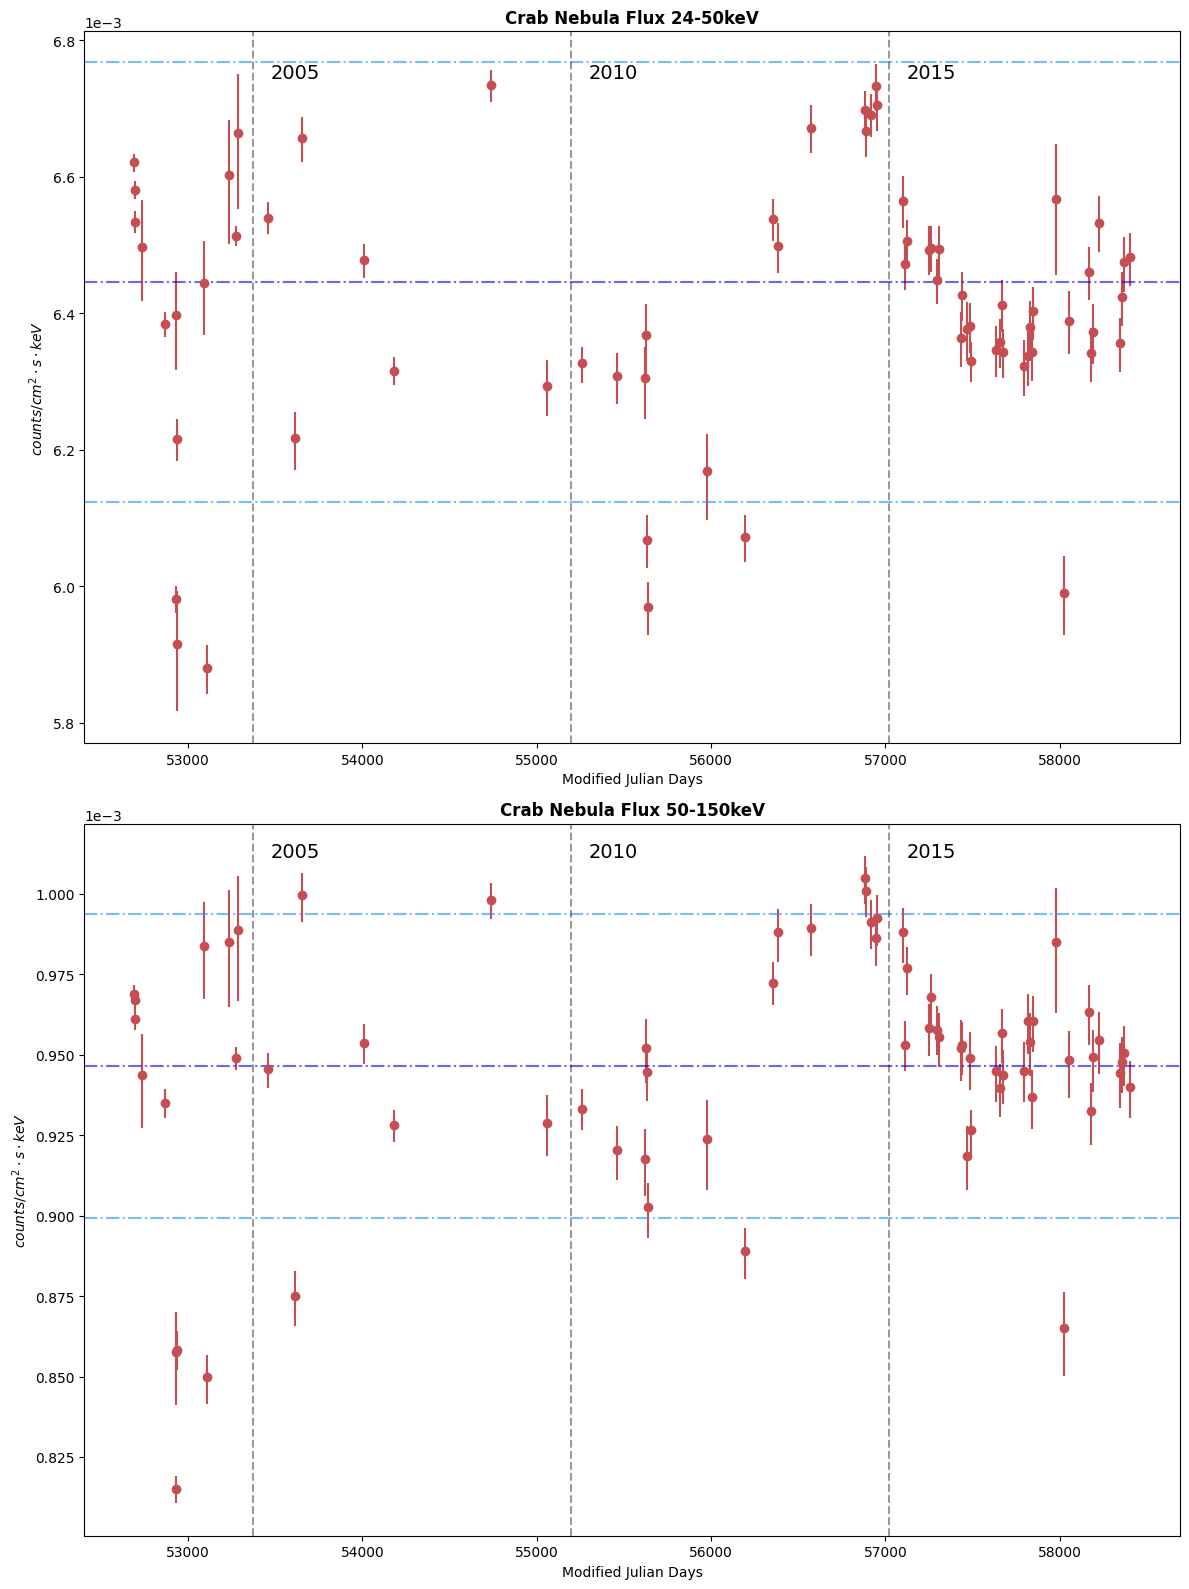

In [13]:
#####################
# PLOT DATA #
#####################

plt.style.use('default')

fig, axis = plt.subplots(2, figsize = (12,16))


axis[0].errorbar(MJD_np[flux24_50_margin_idx], flux24_50_np[flux24_50_margin_idx], xerr=None, yerr = asflux24_50_err[:,flux24_50_margin_idx], fmt = 'ro',  label = r'Crab Nebula Flux 24-50keV')
axis[1].errorbar(MJD_np[flux50_150_margin_idx], flux50_150_np[flux50_150_margin_idx], xerr=None, yerr = asflux50_150_err[:,flux50_150_margin_idx], fmt = 'ro',  label = r'Crab Nebula Flux 50-150keV')
#axis[0].errorbar(MJD, flux24_50, xerr=None, yerr = asflux24_50_err, fmt = 'ro',  label = r'Crab Nebula Flux 24-50keV')
#axis[1].errorbar(MJD, flux50_150, xerr=None, yerr = asflux50_150_err, fmt = 'ro',  label = r'Crab Nebula Flux 50-150keV')


axis[0].set_title('Crab Nebula Flux 24-50keV', weight = 'bold')
axis[1].set_title('Crab Nebula Flux 50-150keV', weight = 'bold')

axis[0].set_xlabel(r'Modified Julian Days')
axis[0].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')


axis[1].set_xlabel(r'Modified Julian Days')
axis[1].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))


axis[0].axhline(np.average(flux24_50_np[flux24_50_margin_idx], weights = 1/(flux24_50_err_mean[flux24_50_margin_idx]**2)), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[0].axhline(np.average(flux24_50_np[flux24_50_margin_idx], weights = 1/(flux24_50_err_mean[flux24_50_margin_idx]**2))*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[0].axhline(np.average(flux24_50_np[flux24_50_margin_idx], weights = 1/(flux24_50_err_mean[flux24_50_margin_idx]**2))*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')


axis[0].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[0].text(53371+100, axis[0].get_ylim()[1]*0.99, '2005', fontsize = 14)
axis[0].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[0].text(55197+100, axis[0].get_ylim()[1]*0.99, '2010', fontsize = 14)
axis[0].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[0].text(57023+100, axis[0].get_ylim()[1]*0.99, '2015', fontsize = 14)


axis[1].axhline(np.average(flux50_150_np[flux50_150_margin_idx], weights = 1/(flux50_150_err_mean[flux50_150_margin_idx]**2)), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[1].axhline(np.average(flux50_150_np[flux50_150_margin_idx], weights = 1/(flux50_150_err_mean[flux50_150_margin_idx]**2))*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[1].axhline(np.average(flux50_150_np[flux50_150_margin_idx], weights = 1/(flux50_150_err_mean[flux50_150_margin_idx]**2))*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')

axis[1].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[1].text(53371+100, axis[1].get_ylim()[1]*0.99, '2005', fontsize = 14)
axis[1].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[1].text(55197+100, axis[1].get_ylim()[1]*0.99, '2010', fontsize = 14)
axis[1].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[1].text(57023+100, axis[1].get_ylim()[1]*0.99, '2015', fontsize = 14)


fig.tight_layout()

fig.show()
plt.savefig('3ml_Parameter_combined_Flux24-150keV_Toulouse_newBin.pdf')




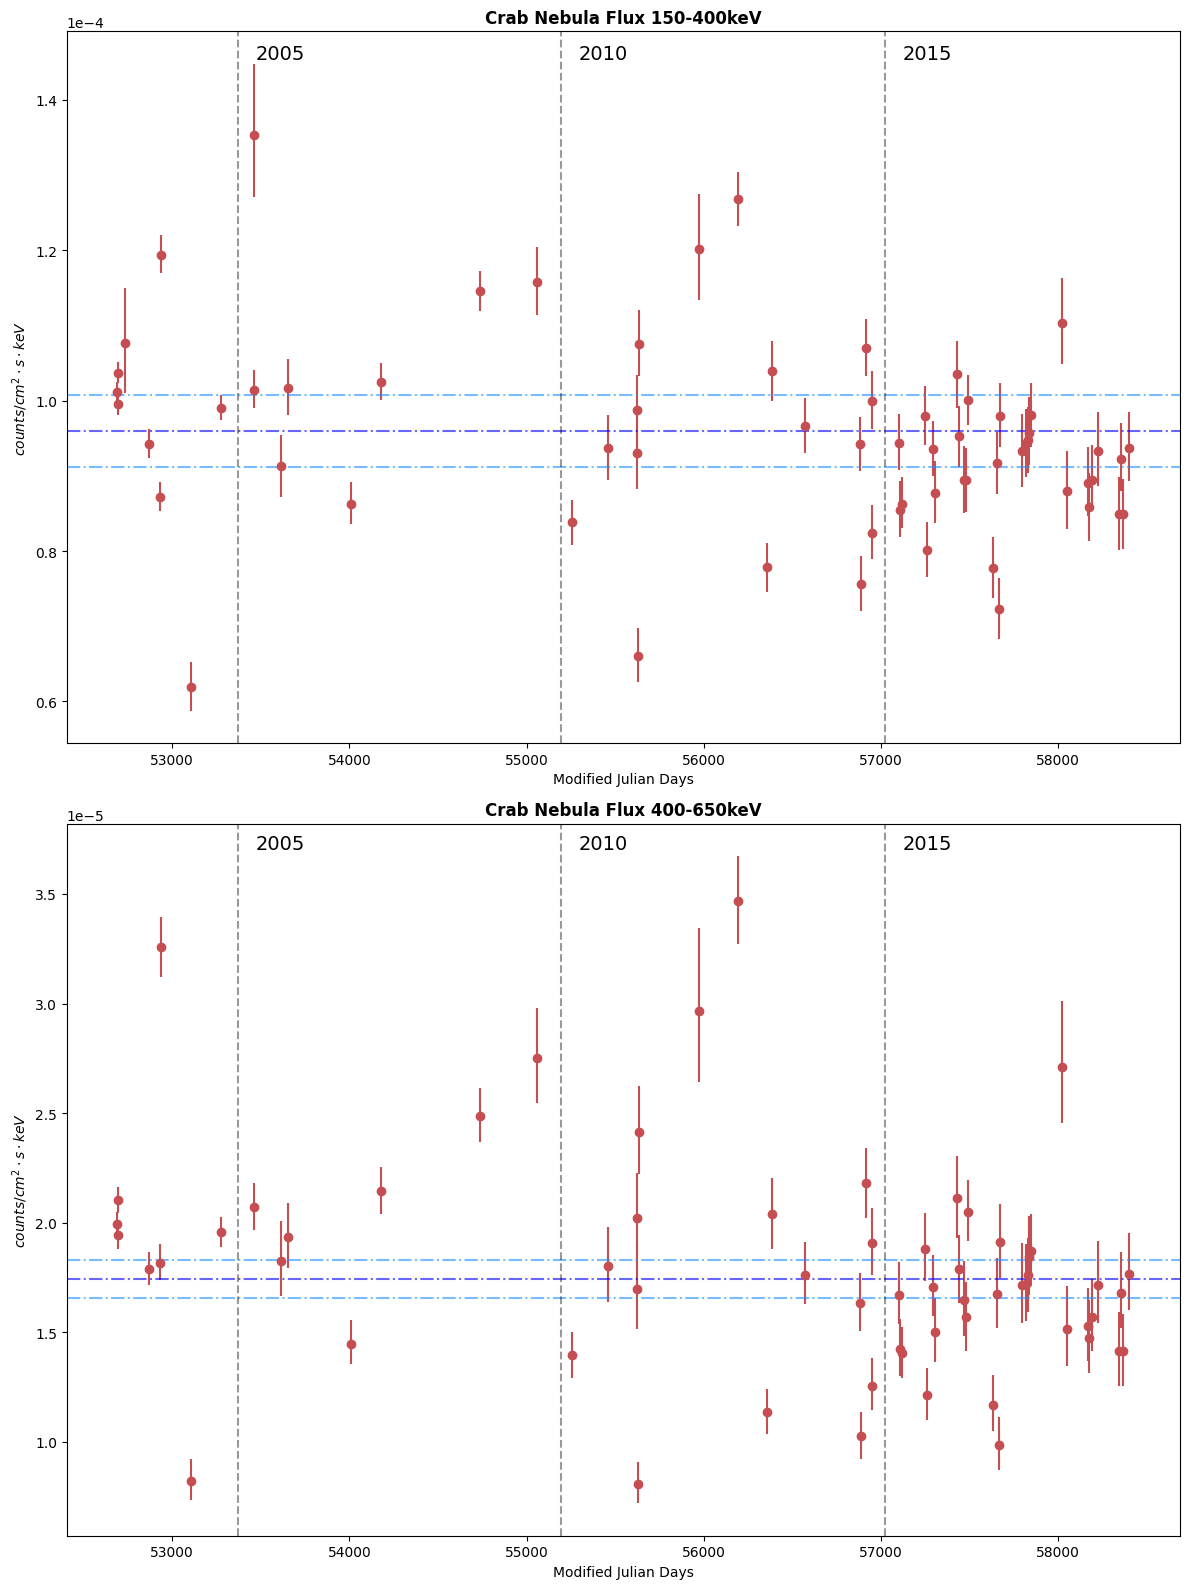

In [14]:
plt.style.use('default')

fig, axis = plt.subplots(2, figsize = (12,16))

axis[0].errorbar(MJD_np[flux150_400_margin_idx], flux150_400_np[flux150_400_margin_idx], xerr=None, yerr = asflux150_400_err[:,flux150_400_margin_idx], fmt = 'ro',  label = r'Crab Nebula Flux 24-50keV')
axis[1].errorbar(MJD_np[flux400_650_margin_idx], flux400_650_np[flux400_650_margin_idx], xerr=None, yerr = asflux400_650_err[:,flux400_650_margin_idx], fmt = 'ro',  label = r'Crab Nebula Flux 50-150keV')
#axis[0].errorbar(MJD, flux150_400, xerr=None, yerr = asflux150_400_err, fmt = 'ro',  label = r'Crab Nebula Flux 150-400keV')
#axis[1].errorbar(MJD, flux400_650, xerr=None, yerr = asflux400_650_err, fmt = 'ro',  label = r'Crab Nebula Flux 400-650keV')


axis[0].set_title('Crab Nebula Flux 150-400keV', weight = 'bold')
axis[1].set_title('Crab Nebula Flux 400-650keV', weight = 'bold')


axis[0].set_xlabel(r'Modified Julian Days')
axis[0].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')


axis[1].set_xlabel(r'Modified Julian Days')
axis[1].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')


axis[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))


axis[0].axhline(np.average(flux150_400_np[flux150_400_margin_idx], weights = 1/(flux150_400_err_mean[flux150_400_margin_idx]**2)), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[0].axhline(np.average(flux150_400_np[flux150_400_margin_idx], weights = 1/(flux150_400_err_mean[flux150_400_margin_idx]**2))*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[0].axhline(np.average(flux150_400_np[flux150_400_margin_idx], weights = 1/(flux150_400_err_mean[flux150_400_margin_idx]**2))*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')


axis[0].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[0].text(53371+100, axis[0].get_ylim()[1]*0.975, '2005', fontsize = 14)
axis[0].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[0].text(55197+100, axis[0].get_ylim()[1]*0.975, '2010', fontsize = 14)
axis[0].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[0].text(57023+100, axis[0].get_ylim()[1]*0.975, '2015', fontsize = 14)


axis[1].axhline(np.average(flux400_650_np[flux400_650_margin_idx], weights = 1/(flux400_650_err_mean[flux400_650_margin_idx]**2)), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[1].axhline(np.average(flux400_650_np[flux400_650_margin_idx], weights = 1/(flux400_650_err_mean[flux400_650_margin_idx]**2))*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[1].axhline(np.average(flux400_650_np[flux400_650_margin_idx], weights = 1/(flux400_650_err_mean[flux400_650_margin_idx]**2))*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')

axis[1].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[1].text(53371+100, axis[1].get_ylim()[1]*0.97, '2005', fontsize = 14)
axis[1].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[1].text(55197+100, axis[1].get_ylim()[1]*0.97, '2010', fontsize = 14)
axis[1].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[1].text(57023+100, axis[1].get_ylim()[1]*0.97, '2015', fontsize = 14)



fig.tight_layout()

fig.show()
plt.savefig('3ml_Parameter_combined_Flux150-650keV_Toulouse_newBin.pdf')

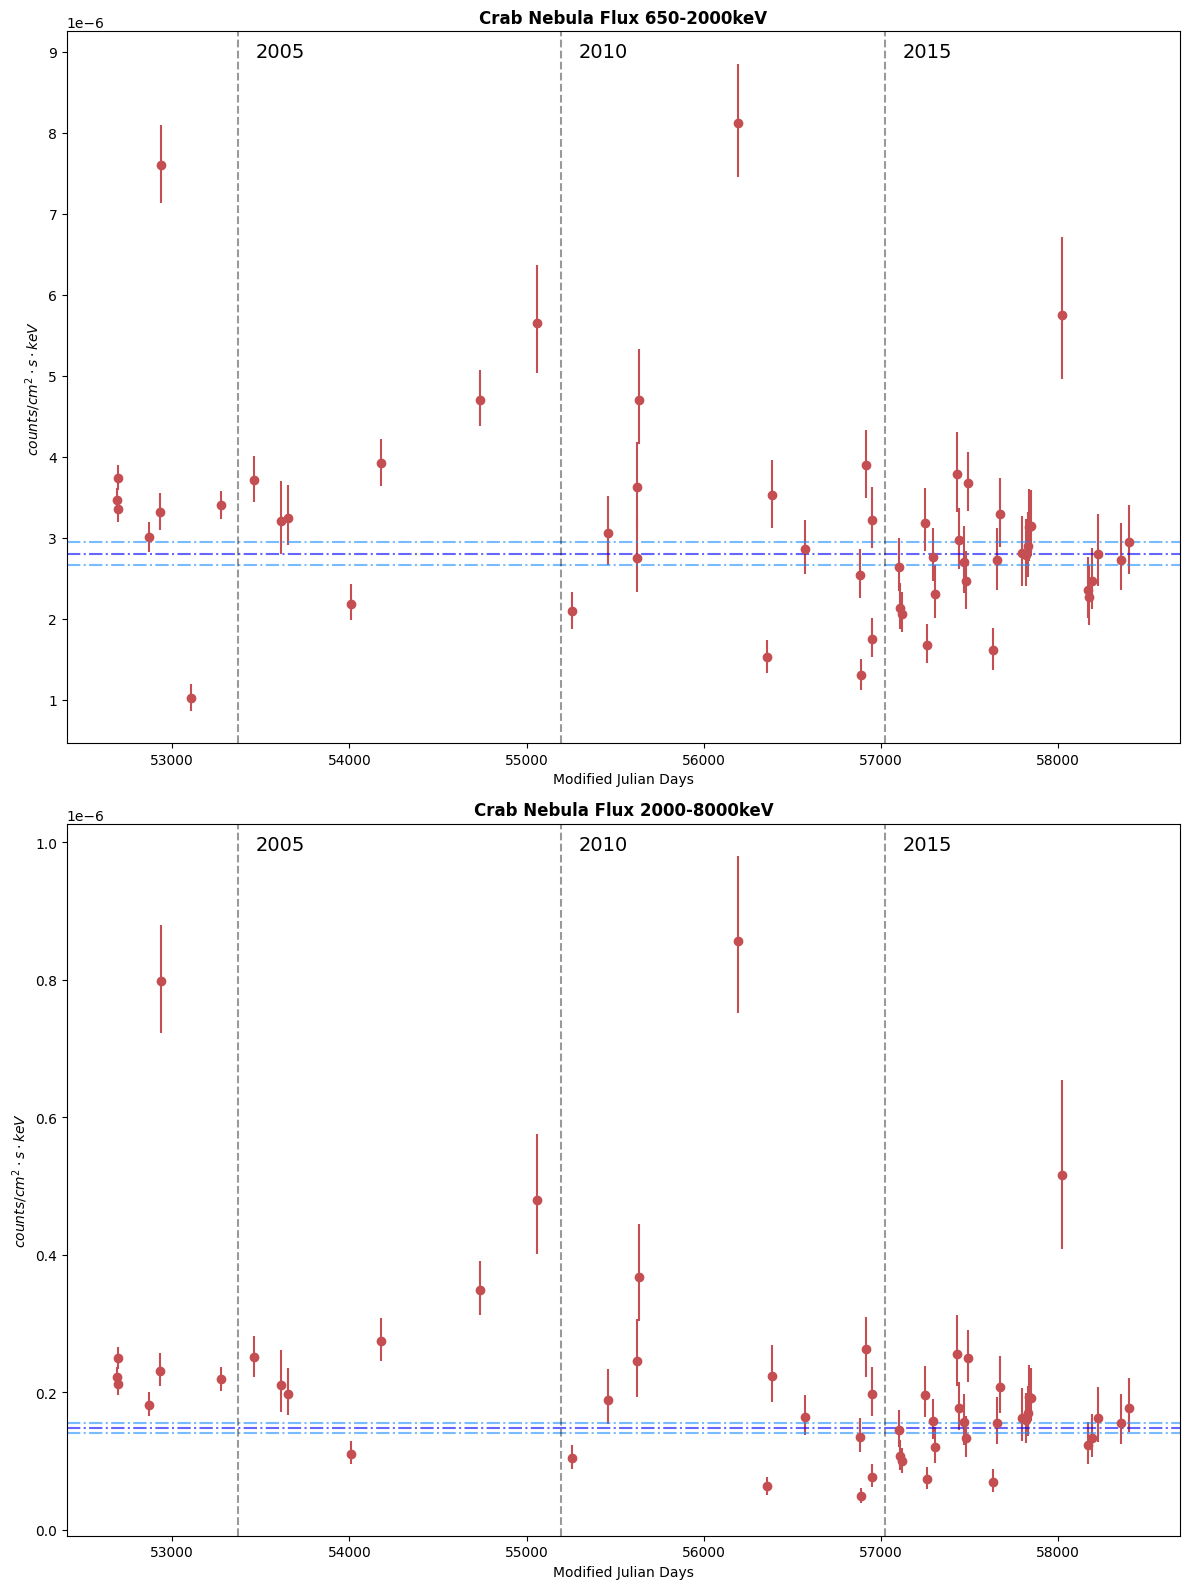

In [15]:
plt.style.use('default')

fig, axis = plt.subplots(2, figsize = (12,16))

axis[0].errorbar(MJD_np[flux650_2000_margin_idx], flux650_2000_np[flux650_2000_margin_idx], xerr=None, yerr = asflux650_2000_err[:,flux650_2000_margin_idx], fmt = 'ro',  label = r'Crab Nebula Flux 24-50keV')
axis[1].errorbar(MJD_np[flux2000_8000_margin_idx], flux2000_8000_np[flux2000_8000_margin_idx], xerr=None, yerr = asflux2000_8000_err[:,flux2000_8000_margin_idx], fmt = 'ro',  label = r'Crab Nebula Flux 50-150keV')
#axis[0].errorbar(MJD, flux650_2000, xerr=None, yerr = asflux650_2000_err, fmt = 'ro',  label = r'Crab Nebula Flux 650-2000keV')
#axis[1].errorbar(MJD, flux2000_8000, xerr=None, yerr = asflux2000_8000_err, fmt = 'ro',  label = r'Crab Nebula Flux 2000-8000keV')


axis[0].set_title('Crab Nebula Flux 650-2000keV', weight = 'bold')
axis[1].set_title('Crab Nebula Flux 2000-8000keV', weight = 'bold')


axis[0].set_xlabel(r'Modified Julian Days')
axis[0].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[1].set_xlabel(r'Modified Julian Days')
axis[1].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')


axis[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))


axis[0].axhline(np.average(flux650_2000_np[flux650_2000_margin_idx], weights = 1/(flux650_2000_err_mean[flux650_2000_margin_idx]**2)), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[0].axhline(np.average(flux650_2000_np[flux650_2000_margin_idx], weights = 1/(flux650_2000_err_mean[flux650_2000_margin_idx]**2))*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[0].axhline(np.average(flux650_2000_np[flux650_2000_margin_idx], weights = 1/(flux650_2000_err_mean[flux650_2000_margin_idx]**2))*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')


axis[0].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[0].text(53371+100, axis[0].get_ylim()[1]*0.966, '2005', fontsize = 14)
axis[0].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[0].text(55197+100, axis[0].get_ylim()[1]*0.966, '2010', fontsize = 14)
axis[0].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[0].text(57023+100, axis[0].get_ylim()[1]*0.966, '2015', fontsize = 14)


axis[1].axhline(np.average(flux2000_8000_np[flux2000_8000_margin_idx], weights = 1/(flux2000_8000_err_mean[flux2000_8000_margin_idx]**2)), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[1].axhline(np.average(flux2000_8000_np[flux2000_8000_margin_idx], weights = 1/(flux2000_8000_err_mean[flux2000_8000_margin_idx]**2))*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[1].axhline(np.average(flux2000_8000_np[flux2000_8000_margin_idx], weights = 1/(flux2000_8000_err_mean[flux2000_8000_margin_idx]**2))*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')

axis[1].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[1].text(53371+100, axis[1].get_ylim()[1]*0.963, '2005', fontsize = 14)
axis[1].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[1].text(55197+100, axis[1].get_ylim()[1]*0.963, '2010', fontsize = 14)
axis[1].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[1].text(57023+100, axis[1].get_ylim()[1]*0.963, '2015', fontsize = 14)

fig.tight_layout()


fig.show()
plt.savefig('3ml_Parameter_combined_Flux650-2000keV_Toulouse_newBin.pdf')